In [2]:
import pandas as pd
import numpy as np

C:\Users\saura\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [0]:
# pip install --upgrade pandas

In [3]:
pd.__version__ 

'1.0.1'

# Reading In Data With read_csv()

In [0]:
# https://andybek.com/pandas-drinks

In [3]:
pd.read_csv('https://andybek.com/pandas-drinks')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [117]:
df = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'])
df

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [5]:
alcohol1 = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

In [6]:
alcohol1.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [21]:
type(alcohol1)

pandas.core.frame.DataFrame

# Series Sizing With .size, .shape, And len()

Not relevant as sqeeze is deprecated

## Resetting Index by converting to series

In [118]:
# squeeze has been deprecated
alcohol = alcohol1.iloc[:,0]

In [9]:
type(alcohol)

pandas.core.series.Series

In [10]:
alcohol1.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [11]:
alcohol.set_axis(alcohol1.index)

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [12]:
type(alcohol)

pandas.core.series.Series

In [13]:
alcohol.size

193

In [14]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [15]:
alcohol.values.size == alcohol.index.size

True

In [16]:
alcohol.shape

(193,)

In [72]:
alcohol.size == alcohol.shape[0]

True

In [73]:
len(alcohol)

193

# Unique Values And Series Monotonicity

In [ ]:
# is_unique

In [17]:
alcohol.is_unique

False

In [18]:
alcohol.head().is_unique

True

In [ ]:
# nunique

In [19]:
alcohol.nunique() #Gives number of unique values

71

In [20]:
alcohol.nunique(dropna=False) #drop na as unique

72

In [0]:
# monotonicity

In [21]:
pd.Series([1,2,3]).is_monotonic

AttributeError: 'Series' object has no attribute 'is_monotonic'

In [23]:
pd.Series([1,2,3,3,3,3]).is_monotonic

True

In [24]:
pd.Series([1,2,3,3,3,3,4,10,79,100]).is_monotonic

True

In [25]:
pd.Series(reversed([1,2,3,3,3,3,4,10,79,100])).is_monotonic_decreasing

True

# The count() Method

In [22]:
alcohol.count()

162

In [23]:
alcohol.size

193

In [24]:
alcohol.hasnans

True

# Accessing And Counting NA's

In [29]:
alcohol.size

193

In [30]:
alcohol.count()

162

In [25]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [26]:
alcohol[alcohol.isnull()].index #non-null index are returned here

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [33]:
type(alcohol[alcohol.isnull()].index)

pandas.core.indexes.base.Index

In [27]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [35]:
len(list(alcohol[alcohol.isnull()].index))

31

In [0]:
# cumbersome: very difficult to work with

In [0]:
# antonym: pandorable -> adorable and involving pandas

In [28]:
alcohol.isnull().sum()

31

In [0]:
# booleans are integers in python

In [40]:
sum([True, False, True])

2

In [0]:
all = alcohol.size

In [0]:
nonnulls = alcohol.count()

In [0]:
nulls = alcohol.isna().sum()

In [44]:
all == nonnulls + nulls

True

# BONUS: Another Approach

In [0]:
# ufunc -> universal function

In [46]:
np.isnan

<ufunc 'isnan'>

In [0]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)

In [48]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [49]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [50]:
alcohol[np.isnan].size

31

In [0]:
# alcohol[alcohol.isna()]

## The Other Side: notnull() And notna()

In [0]:
# notnull()

In [86]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [29]:
alcohol.notna()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [30]:
type(alcohol.notna()) #passing boolen to series with loc return true value

pandas.core.series.Series

In [87]:
alcohol.loc[alcohol.notna()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [31]:
alcohol.notna().sum()

162

In [32]:
alcohol.count()

162

In [33]:
alcohol.size

193

In [90]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

True

In [91]:
type(True)

bool

## BONUS: Booleans Are Literally Numbers In Python

In [59]:
True + 19

20

In [60]:
True + True - False + True * 3

5

In [0]:
# 5 / False

In [62]:
type(True)

bool

In [63]:
type(False)

bool

In [64]:
bool.__mro__

(bool, int, object)

In [92]:
alcohol.isnull().sum()

31

# Skill Challenge

###### **1**.

Isolate the non-nulls in the *alcohol* series and assign them to the variable *wine_servings*.

###### **2**.

What is the total wine consumed by countries in *wine_servings*?

###### **BONUS 3**.

In the *wine_servings* dataset, what was the total wine consumed by countries that consumed less than 100 servings?

*Hint*: apply a boolean mask to identify such countries, then sum().

## Solution

In [0]:
# 1

In [0]:
wine_servings = alcohol[alcohol.notnull()]

In [68]:
wine_servings.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [0]:
# 2

In [70]:
wine_servings.sum()

8221.0

In [0]:
# 3

In [72]:
wine_servings < 100

country
Albania               True
Algeria               True
Andorra              False
Angola                True
Antigua & Barbuda     True
                     ...  
Vanuatu               True
Venezuela             True
Vietnam               True
Zambia                True
Zimbabwe              True
Name: wine_servings, Length: 162, dtype: bool

In [73]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [74]:
wine_servings[wine_servings < 100].sum()

2416.0

# Dropping And Filling NAs

In [93]:
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [94]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [0]:
# one way: reassignment

In [0]:
# alcohol = alcohol.dropna()

In [0]:
# another way: inplace param

In [0]:
# alcohol.dropna(inplace=True)

In [95]:
alcohol.dropna(inplace=False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

Use of inplace = false?
- This will not modify original alcohol series but return a new series. If marked as true it will modify the original series

In [34]:
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

# Descriptive Statistics

In [35]:
alcohol.sum()

8221.0

In [0]:
# average

In [85]:
alcohol.count()

162

In [86]:
alcohol.sum() / alcohol.count()

50.74691358024691

In [87]:
alcohol.mean()

50.74691358024691

In [0]:
# median

In [89]:
alcohol.median()

11.5

In [98]:
alcohol.quantile(.5)

11.5

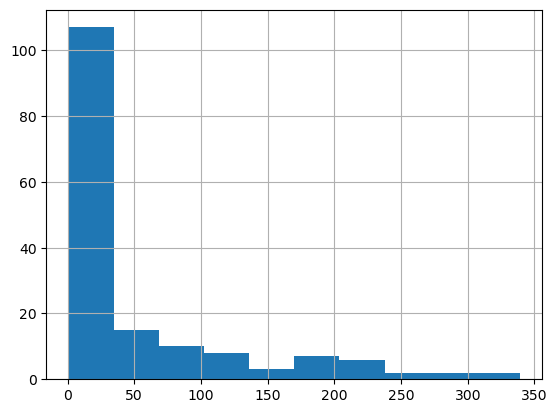

In [39]:
alcohol.hist(bins=10);

In [0]:
# IQR

In [100]:
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [101]:
iqr

58.25

In [0]:
# min and max

In [96]:
alcohol.min()

1.0

In [97]:
alcohol.max()

339.0

In [0]:
# standard deviation

In [102]:
alcohol.std()

76.13491716376171

In [0]:
# variance

In [103]:
alcohol.var()

5796.5256115328575

In [104]:
alcohol.std()**2 == alcohol.var()

True

# The describe() Method

In [40]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [41]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [42]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object) #exclude data type

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [106]:
alcohol.dtype

dtype('float64')

# mode() And value_counts() 

In [0]:
# mode

In [43]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [44]:
alcohol == 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [110]:
alcohol[alcohol==1].size

28

In [0]:
# value counts

In [112]:
alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
185.0     1
218.0     1
84.0      1
149.0     1
54.0      1
Name: wine_servings, Length: 71, dtype: int64

In [46]:
alcohol.value_counts().iloc[0]

28

In [114]:
alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
185.0    0.006173
218.0    0.006173
84.0     0.006173
149.0    0.006173
54.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

In [115]:
28/alcohol.count()

0.1728395061728395

# idxmax() And idxmin()

In [48]:
alcohol.max()

339.0

In [47]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [49]:
alcohol[alcohol == alcohol.max()].index

Index(['Portugal'], dtype='object', name='country')

In [119]:
type(alcohol[alcohol == alcohol.max()].index)

pandas.core.indexes.base.Index

In [120]:
alcohol[alcohol == alcohol.max()].index[0]

'Portugal'

In [50]:
alcohol.idxmax()

'Portugal'

In [122]:
alcohol.idxmin()

'Brunei'

In [123]:
alcohol.min()

1.0

In [124]:
alcohol.value_counts().head(1)

1.0    28
Name: wine_servings, dtype: int64

In [125]:
alcohol[alcohol == alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [126]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [127]:
alcohol[alcohol.idxmax()]

339.0

In [128]:
alcohol.max()

339.0

# Sorting With sort_values()

In [52]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [55]:
alco2 = alcohol.sort_values(ascending=False, na_position='last', kind='quicksort', inplace=False) # mergesort, heapsort

In [58]:
alco2.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [0]:
# 1: reassignment

In [0]:
# 2: inplace param - modifying the original series

# nlargest() And nsmallest()

In [134]:
alcohol.min()

1.0

In [135]:
alcohol.max()

339.0

In [136]:
alcohol.sort_values(ascending=False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [137]:
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [138]:
alcohol.nsmallest(29)

country
Niger                       1.0
Nicaragua                   1.0
Namibia                     1.0
Morocco                     1.0
Mali                        1.0
Malawi                      1.0
Oman                        1.0
Papua New Guinea            1.0
Vietnam                     1.0
Philippines                 1.0
Tanzania                    1.0
Kiribati                    1.0
Chad                        1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Comoros                     1.0
Central African Republic    1.0
Jordan                      1.0
Canada                      1.0
Guyana                      1.0
Cambodia                    1.0
Haiti                       1.0
Brunei                      1.0
Solomon Islands             1.0
Thailand                    1.0
Sierra Leone                2.0
Name: wine_servings, dtype: float64

# Sorting With sort_index()

In [59]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [60]:
alcohol.sort_index(ascending=False, na_position='first', inplace=True)

In [61]:
alcohol.index.isnull().sum()

0

In [62]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

# Skill Challenge

###### **1**.

Select all the countries from *alcohol* that have more than 50 wine servings, and save them (and the corresponding values) in a variable *fifty_plus*.

###### **2**.

From *fifty_plus*, choose the countries with the smallest 20 wine servings values. 

###### **3**.

What is the mean, median and standard deviation for the sample from Step 2?

#### Solution

In [0]:
# 1

In [0]:
fifty_plus = alcohol[alcohol > 50]

In [145]:
fifty_plus.head()

country
United Kingdom    195.0
USA                84.0
Sweden            186.0
St. Lucia          71.0
Spain             112.0
Name: wine_servings, dtype: float64

In [146]:
fifty_plus.count()

48

In [0]:
# 2

In [148]:
fifty_plus.nsmallest(n=20)

country
Seychelles             51.0
Bahamas                51.0
Albania                54.0
Poland                 56.0
Lithuania              56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [0]:
# 3

In [150]:
fifty_plus.nsmallest(n=20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [151]:
fifty_plus.nsmallest(n=20).median()

73.5

In [152]:
fifty_plus.nsmallest(n=20).mean()

74.25

In [153]:
fifty_plus.nsmallest(n=20).std()

19.07292100831631

# Series Arithmetics And fill_value()

In [154]:
alcohol + 2

country
Zimbabwe         6.0
Zambia           6.0
Yemen            NaN
Vietnam          3.0
Venezuela        5.0
               ...  
Angola          47.0
Andorra        314.0
Algeria         16.0
Albania         56.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [155]:
(alcohol -10) * 2

country
Zimbabwe       -12.0
Zambia         -12.0
Yemen            NaN
Vietnam        -18.0
Venezuela      -14.0
               ...  
Angola          70.0
Andorra        604.0
Algeria          8.0
Albania         88.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [156]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

In [0]:
alcohol.sort_index(inplace=True)

In [158]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [63]:
more_drinks = pd.Series({'Albania': 6, 'Alberia': 19, 'Algeria': 10, 'Afghanistan': 100, 'Yemen': 101})

In [64]:
more_drinks

Albania          6
Alberia         19
Algeria         10
Afghanistan    100
Yemen          101
dtype: int64

In [66]:
alcohol

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          1.0
Venezuela        3.0
               ...  
Angola          45.0
Andorra        312.0
Algeria         14.0
Albania         54.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [67]:
alcohol + more_drinks

Afghanistan     NaN
Albania        60.0
Alberia         NaN
Algeria        24.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [71]:
alcohol.fillna(10,inplace = False) + more_drinks #check afghanistan is also filled but only first value is filled

Afghanistan    110.0
Albania         60.0
Alberia          NaN
Algeria         24.0
Andorra          NaN
               ...  
Venezuela        NaN
Vietnam          NaN
Yemen          111.0
Zambia           NaN
Zimbabwe         NaN
Length: 194, dtype: float64

In [ ]:
# similar to above operation usind add

In [161]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan    100.0
Albania         60.0
Alberia         19.0
Algeria         24.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [162]:
alcohol - more_drinks

Afghanistan     NaN
Albania        48.0
Alberia         NaN
Algeria         4.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [163]:
alcohol.subtract(more_drinks, fill_value=0)

Afghanistan   -100.0
Albania         48.0
Alberia        -19.0
Algeria          4.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen         -101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [164]:
alcohol.divide(more_drinks, fill_value=1)

Afghanistan      0.010000
Albania          9.000000
Alberia          0.052632
Algeria          1.400000
Andorra        312.000000
                  ...    
Venezuela        3.000000
Vietnam          1.000000
Yemen            0.009901
Zambia           4.000000
Zimbabwe         4.000000
Length: 194, dtype: float64

In [165]:
alcohol.multiply(more_drinks, fill_value=1)

Afghanistan    100.0
Albania        324.0
Alberia         19.0
Algeria        140.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [166]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [167]:
more_drinks.head()

Albania          6
Alberia         19
Algeria         10
Afghanistan    100
Yemen          101
dtype: int64

# BONUS: Calculating Variance And Standard Deviation

In [168]:
alcohol.var()

5796.52561153286

In [169]:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

5796.5256115328575

In [170]:
alcohol.std()

76.13491716376173

In [171]:
((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))**(1/2)

76.13491716376171

# Cumulative Operations

In [0]:
# sum

In [72]:
alcohol.sum()

8221.0

In [73]:
alcohol.cumsum()

country
Zimbabwe          4.0
Zambia            8.0
Yemen             NaN
Vietnam           9.0
Venezuela        12.0
                ...  
Angola         7841.0
Andorra        8153.0
Algeria        8167.0
Albania        8221.0
Afghanistan       NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
# operation on NAN will result in NAN

In [175]:
np.NaN + 123192380912

nan

In [176]:
pd.NA + 12312

<NA>

In [177]:
alcohol.prod()

3.4276115052182805e+183

In [178]:
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [179]:
alcohol.cumprod()[-1] == alcohol.prod()

True

In [0]:
# cummin cummax

In [181]:
alcohol.min()

1.0

In [74]:
alcohol.cummin()

country
Zimbabwe       4.0
Zambia         4.0
Yemen          NaN
Vietnam        1.0
Venezuela      1.0
              ... 
Angola         1.0
Andorra        1.0
Algeria        1.0
Albania        1.0
Afghanistan    NaN
Name: wine_servings, Length: 193, dtype: float64

In [75]:
alcohol.max()

339.0

In [76]:
alcohol.cummax()

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          4.0
Venezuela        4.0
               ...  
Angola         339.0
Andorra        339.0
Algeria        339.0
Albania        339.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [185]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [186]:
pd.Series({'a':'v1', 'b':'v2', 'c':'v3'})

a    v1
b    v2
c    v3
dtype: object

# Pairwise Differences With diff()

In [187]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [77]:
alcohol.diff().head()

country
Zimbabwe     NaN
Zambia       0.0
Yemen        NaN
Vietnam      NaN
Venezuela    2.0
Name: wine_servings, dtype: float64

In [78]:
alcohol.diff(periods=2).head()

country
Zimbabwe     NaN
Zambia       NaN
Yemen        NaN
Vietnam     -3.0
Venezuela    NaN
Name: wine_servings, dtype: float64

# Series Iteration

In [80]:
mini_alc = alcohol[:10]

In [81]:
mini_alc

country
Zimbabwe                  4.0
Zambia                    4.0
Yemen                     NaN
Vietnam                   1.0
Venezuela                 3.0
Vanuatu                  11.0
Uzbekistan                8.0
Uruguay                  22.0
United Kingdom          195.0
United Arab Emirates      5.0
Name: wine_servings, dtype: float64

In [82]:
for i in mini_alc:
  print(i)

4.0
4.0
nan
1.0
3.0
11.0
8.0
22.0
195.0
5.0


In [83]:
for i in mini_alc.index:
  print(i)

Zimbabwe
Zambia
Yemen
Vietnam
Venezuela
Vanuatu
Uzbekistan
Uruguay
United Kingdom
United Arab Emirates


In [84]:
for i in mini_alc.index:
  print(i, mini_alc[i])

Zimbabwe 4.0
Zambia 4.0
Yemen nan
Vietnam 1.0
Venezuela 3.0
Vanuatu 11.0
Uzbekistan 8.0
Uruguay 22.0
United Kingdom 195.0
United Arab Emirates 5.0


# Filtering: filter(), where(), And mask()

In [86]:
alcohol.filter(regex='^V')

country
Vietnam       1.0
Venezuela     3.0
Vanuatu      11.0
Name: wine_servings, dtype: float64

In [87]:
alcohol.filter(like='stan')

country
Uzbekistan       8.0
Turkmenistan    32.0
Tajikistan       NaN
Pakistan         NaN
Kyrgyzstan       6.0
Kazakhstan      12.0
Afghanistan      NaN
Name: wine_servings, dtype: float64

In [88]:
alcohol[alcohol > 200]

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [89]:
alcohol.loc[alcohol > 200]

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [90]:
def gt200(x):
  return x > 200

In [91]:
alcohol[gt200]

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [0]:
# the where() method
# The where method is used to replace values where a condition is False. It keeps the values where the condition is True and replaces the values where the condition is False.

In [97]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [10, 20, 30, 40]})
where_df = df.where(df > 2)
where_df

,A,B
0,NaN,10
1,NaN,20
2,3.0,30
3,4.0,40


In [92]:
alcohol.where(lambda x: x>200).dropna()

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [93]:
alcohol.where(lambda x: x<=200).dropna()

country
Zimbabwe              4.0
Zambia                4.0
Vietnam               1.0
Venezuela             3.0
Vanuatu              11.0
                     ... 
Armenia              11.0
Antigua & Barbuda    45.0
Angola               45.0
Algeria              14.0
Albania              54.0
Name: wine_servings, Length: 150, dtype: float64

In [0]:
# the mask() method
# The mask method is used to replace values where a condition is True. Essentially, it inverts the condition provided to it.

In [95]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [10, 20, 30, 40]})
masked_df = df.mask(df > 2)
masked_df

,A,B
0,1.0,NaN
1,2.0,NaN
2,NaN,NaN
3,NaN,NaN


In [206]:
alcohol.mask(lambda x: x>200).dropna() # will remove all where greater than 200

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

# Transforming With update(), apply() And map()

In [98]:
alcohol.head(10)

country
Zimbabwe                  4.0
Zambia                    4.0
Yemen                     NaN
Vietnam                   1.0
Venezuela                 3.0
Vanuatu                  11.0
Uzbekistan                8.0
Uruguay                  22.0
United Kingdom          195.0
United Arab Emirates      5.0
Name: wine_servings, dtype: float64

In [0]:
# spot v global transforms

In [99]:
alcohol.loc['Algeria'] = 19

In [101]:
alcohol.tail(10)

country
Austria              191.0
Australia            212.0
Armenia               11.0
Argentina            221.0
Antigua & Barbuda     45.0
Angola                45.0
Andorra              312.0
Algeria               19.0
Albania               54.0
Afghanistan            NaN
Name: wine_servings, dtype: float64

In [103]:
alcohol.loc['Albania'] = 190
alcohol.loc['Afghanistan'] = 20
alcohol.loc['Andorra'] = 29

In [104]:
alcohol.tail(10)

country
Austria              191.0
Australia            212.0
Armenia               11.0
Argentina            221.0
Antigua & Barbuda     45.0
Angola                45.0
Andorra               29.0
Algeria               19.0
Albania              190.0
Afghanistan           20.0
Name: wine_servings, dtype: float64

In [0]:
# the update() method

In [105]:
alcohol.update(pd.Series(data=[200, 20], index=['Albania', 'Algeria']))

In [107]:
alcohol.tail(10)

country
Austria              191.0
Australia            212.0
Armenia               11.0
Argentina            221.0
Antigua & Barbuda     45.0
Angola                45.0
Andorra               29.0
Algeria               20.0
Albania              200.0
Afghanistan           20.0
Name: wine_servings, dtype: float64

In [0]:
# the apply() method

In [217]:
alcohol.map(lambda x: x**2)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [218]:
alcohol.map(np.square)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [109]:
# apply()
# The apply method in pandas is a powerful tool used to apply a function along an axis of the DataFrame or Series. It can be used to perform complex operations and transformations on data. 

In [108]:
def multiply_by_self(x):
  return x*x

In [110]:
alcohol.apply(multiply_by_self)

country
Zimbabwe          16.0
Zambia            16.0
Yemen              NaN
Vietnam            1.0
Venezuela          9.0
                ...   
Angola          2025.0
Andorra          841.0
Algeria          400.0
Albania        40000.0
Afghanistan      400.0
Name: wine_servings, Length: 193, dtype: float64

In [124]:
alcohol.tail()

country
Venezuela     45.0
Vietnam       29.0
Yemen         20.0
Zambia       200.0
Zimbabwe      20.0
Name: wine_servings, dtype: float64

In [111]:
def multiply_by_self_with_min(x, min_servings):
  if x < min_servings:
    return x**2
  
  return x

In [119]:
alcohol.apply(lambda x: multiply_by_self_with_min(x, 200))

country
Afghanistan      16.0
Albania          16.0
Algeria           NaN
Andorra           1.0
Angola            9.0
                ...  
Venezuela      2025.0
Vietnam         841.0
Yemen           400.0
Zambia          200.0
Zimbabwe        400.0
Name: wine_servings, Length: 193, dtype: float64

In [120]:
alcohol.head()

country
Afghanistan    4.0
Albania        4.0
Algeria        NaN
Andorra        1.0
Angola         3.0
Name: wine_servings, dtype: float64

In [121]:
alcohol.apply(multiply_by_self_with_min, min_servings=200) #same as above lambda function

country
Afghanistan      16.0
Albania          16.0
Algeria           NaN
Andorra           1.0
Angola            9.0
                ...  
Venezuela      2025.0
Vietnam         841.0
Yemen           400.0
Zambia          200.0
Zimbabwe        400.0
Name: wine_servings, Length: 193, dtype: float64

In [0]:
# the map() method

#### Skill Challenge

###### **1**.

Read the drinks.csv dataset again, this time bringing in the beer_servings sequence into a new <ins>series</ins> with country again acting as the index. Assign this series to the variable *beers*.

Link to data: https://andybek.com/pandas-drinks

###### **2**.

Calculate the mean, median, and standard deviation of beer servings in *beers*. Is the distribution right or left skewed?

###### **3**.

Slice the first 10 countriees from *beers*. Are these relatively large or small relative to the rest of the sample?

**BONUS**: To answer that, we could compare each value to the mean or median. An even
better approach would be to calculate standard scores, or z-scores as they 
are known.

###### **BONUS 4**.

Create a new series that uses series arithmetics to calculate the z-score 
for each serving by subtracting from each the mean and dividing the difference
by the standard deviation. Point the variable *z_scores* to this series.

Which country has the largest absolute z-score? Is this a positive or negative deviation? 

# Solution I - Reading Data

In [125]:
data_url = 'https://andybek.com/pandas-drinks'

In [127]:
beers = pd.read_csv(data_url, usecols=['country', 'beer_servings'], index_col='country')

In [128]:
beers.head()

,beer_servings
country,
Afghanistan,NaN
Albania,89.0
Algeria,25.0
Andorra,245.0
Angola,217.0


In [229]:
type(beers)

pandas.core.series.Series

#### Solution II - Mean, Median, And Standard Deviation

In [230]:
beers.mean()

102.87078651685393

In [231]:
beers.median()

60.0

In [232]:
beers.quantile(.5)

60.0

In [233]:
beers.std()

100.64571267934778

In [234]:
beers.var()**(1/2)

100.64571267934778

In [235]:
np.sqrt(beers.var())

100.64571267934778

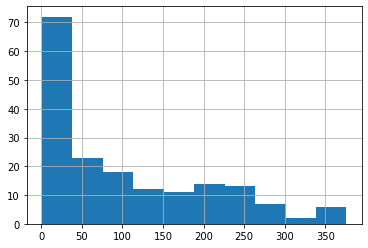

In [236]:
beers.hist();

In [237]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

#### Solution III - Z-scores

In [238]:
beers[:10]

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [0]:
# beers.head(10)

In [240]:
beers.mean()

102.87078651685393

In [241]:
beers[:10] - beers.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [242]:
(beers[:10] - beers.mean()).apply(lambda x: 'low' if x<0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [243]:
(beers - beers.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()

low     112
high     81
Name: beer_servings, dtype: int64

In [0]:
z_scores = (beers - beers.mean())/beers.std()

In [245]:
z_scores.head(10)

country
Afghanistan               NaN
Albania             -0.137818
Algeria             -0.773712
Andorra              1.412174
Angola               1.133970
Antigua & Barbuda   -0.902878
Argentina            0.895510
Armenia             -0.813455
Australia            1.571147
Austria              1.749992
Name: beer_servings, dtype: float64

In [246]:
z_scores.min()

-1.012172141315241

In [247]:
z_scores.max()

2.7137689844109123

In [248]:
z_scores.abs().max()

2.7137689844109123

In [249]:
beers.idxmax()

'Namibia'

In [250]:
beers['Namibia']

376.0

In [251]:
beers[beers.idxmax()]

376.0

In [252]:
z_scores.abs().max() * beers.std() + beers.mean()

376.0